In [1]:
#!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm

# Linear Regression 예시

NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석을 해보자. 우선 make_regression 명령을 사용하여 다음과 같이 1차원 특징 데이터 x와 이 값에 의존하는 y를 만든다.

In [3]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

바이어스 값은 100이고 make_regression 명령이 생성한 모수 값은 다음과 같다.

In [4]:
w

array(86.44794301)

따라서 x와 y는 다음과 같은 관계를 가진다.

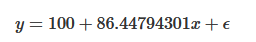

위에서 구한 수식을 이용하여 선형회귀 계수를 추정하면 다음과 같다. 

In [5]:
#OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

즉, 최소자승법으로 구한 선형회귀모형은 다음과 같다.

y^ = 99.79150869 + 86.96171201x

이 결과에서 알 수 있는 것은 선형 회귀를 통해 구한 가중치 벡터는 정답과 비슷하지만 똑같지는 않다는 점이다.
이 식에 여러가지 x 값을 대입하여 y^을 구해본 결과를 원래 데이터와 비교하면 다음 그림과 같다.

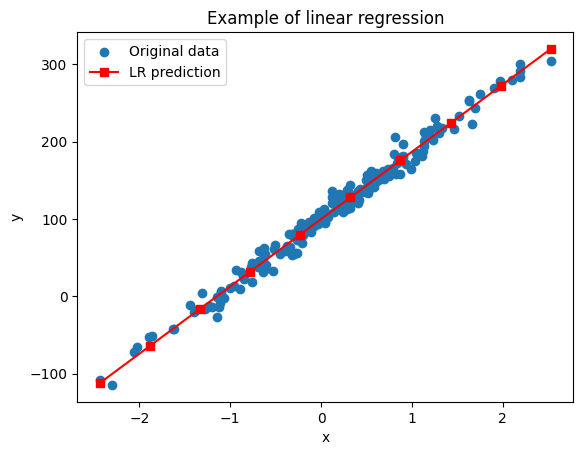

In [6]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="Original data")
plt.plot(x_new, y_new, 'rs-', label="LR prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of linear regression")
plt.legend()
plt.show()

## Scikit-learn 선형 회귀분석

In [7]:
from sklearn.linear_model import LinearRegression

# fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수이다. 디폴트 값이 True다. 만약 상수항이 없으면 fit_intercept=False로 설정한다.
LR_model = LinearRegression(fit_intercept=True) 

# fit 메서드로 가중치 값을 추정한다. 상수항 결합을 자동으로 해주므로 사용자가 직접 add_constant 등의 명령를 써서 상수항 결합을 할 필요는 없다.
# fit 메서드를 호출하면 모형 객체는 다음과 같은 속성을 가지게 된다. 또한 fit 메서드는 객체 자신을 반환한다.
LR_model = LR_model.fit(X0,y)


# coef_ : 추정된 가중치 벡터
# intercept_ : 추정된 상수항
print(LR_model.intercept_, LR_model.coef_)

[99.79150869] [[86.96171201]]


In [8]:
# predict 메서드를 사용하면 새로운 xnew 값에 대응하는 y 값을 예측할 수 있다. xnew 값으로 2차원 배열을 써야한다는 점을 주의한다.
pred_y = LR_model.predict([[-2],[-1],[0],[1],[2]])
print(pred_y)

[[-74.13191534]
 [ 12.82979668]
 [ 99.79150869]
 [186.7532207 ]
 [273.71493272]]


## statsmodel 선형 회귀 분석

 statsmodels의 OLS 명령으로 선형회귀를 하면 다음과 같다. 우선 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다.

In [9]:
import statsmodels.api as sm

df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


다음으로 모델 객체를 만든다. 독립변수만 있는 데이터프레임 dfX와 종속변수만 있는 데이터프레임 dfy를 인수로 넣어서 만들 수도 있다. 이 때는 수동으로 상수항 추가를 해주어야 한다.

In [10]:
dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

또는 formula 문자열을 사용하여 모형을 만들 수도 있다. formula 문자열을 만드는 방법은 ~ 기호의 왼쪽에 종속변수의 이름을 넣고 ~ 기호의 오른쪽에 독립변수의 이름을 넣는다. 만약 독립변수가 여러개일 경우에는 patsy 패키지의 formula 문자열을 만드는 법을 따른다.

In [11]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

RegressionResults 클래스 객체의 summary 메서드는 복잡한 형태의 보고서를 보여준다. 보고서의 자세한 내용에 대해서는 확률적 회귀모형에서 추후 설명한다. 여기에서는 coef 열의 값이 가중치값이라는 것만 알면 된다.

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          8.17e-182
Time:                        18:48:25   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

RegressionResults 클래스 객체의 predict 메서드를 사용하면 새로운 xnew 값에 대응하는 y 값을 예측할 수 있다.

In [13]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

RegressionResults 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

* params: 가중치 벡터

* resid: 잔차 벡터

가중치 벡터의 값은 다음처럼 확인한다.

In [14]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

잔차 벡터의 형태는 다음과 같다.

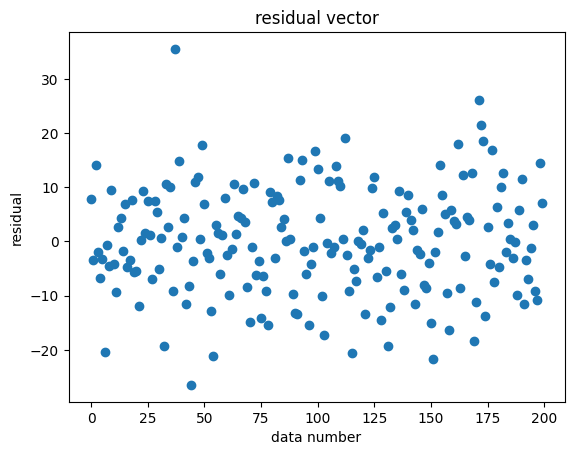

In [15]:
result.resid.plot(style="o")
plt.title("residual vector")
plt.xlabel("data number")
plt.ylabel("residual")
plt.show()

직교방정식에서 나온 두 가지 성질이 성립하는지 살펴보자. 우선 잔차의 합을 구하면 0이라는 것을 알 수 있다.

In [16]:
result.resid.sum()

6.064482249712455e-12

다음으로 x의 평균값을 넣으면 y의 평균값과 같은 값이 나온다는 것도 확인할 수 있다.

In [17]:
result.predict({"x": X0.mean()})

0    109.069351
dtype: float64

In [18]:
y.mean()

109.06935068170773

# 보스턴 집값예측

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

In [19]:
b_df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
b_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 데이터 탐색

In [20]:
b_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 전처리

In [22]:
X_data = b_df.iloc[:,0:13]
y_data = b_df.iloc[:, [-1]]

## 다중선형회귀 모델

In [23]:
from sklearn.model_selection import train_test_split
X_data = b_df.iloc[:,0:13]
y_data = b_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2024)

In [45]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model = LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)

## 다중회귀분석

intercept:  37.691775636952784
coefficient: 
 [-1.05520754e-01  4.23097338e-02  4.09272264e-02  3.45374527e+00
 -1.80792106e+01  3.47711493e+00  4.26538938e-03 -1.35301756e+00
  3.00488961e-01 -1.11180311e-02 -9.17544361e-01  8.02905534e-03
 -5.61632719e-01]


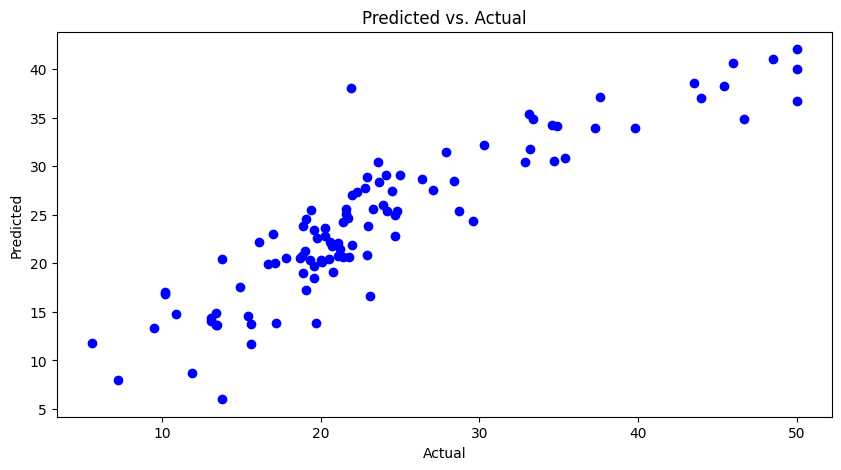

In [65]:
import matplotlib.pyplot as plt
print('intercept: ',LR_model.intercept_)
print('coefficient: \n',LR_model.coef_)

residuals = y_test - LR_pred

# 예측값과 실제값의 scatter 플롯
plt.figure(figsize=(10, 5))
plt.scatter(y_test, LR_pred, color='blue')
plt.title('Predicted vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



In [ ]:
'Predicted vs. Actual' 그래프 양의 선형관계를 보여주고있다. 즉 모델이 작으면 작은값을 크면 큰값을 잘 예측한다는 걸 설명한다. 

### 잔차분석

### 모델 평가

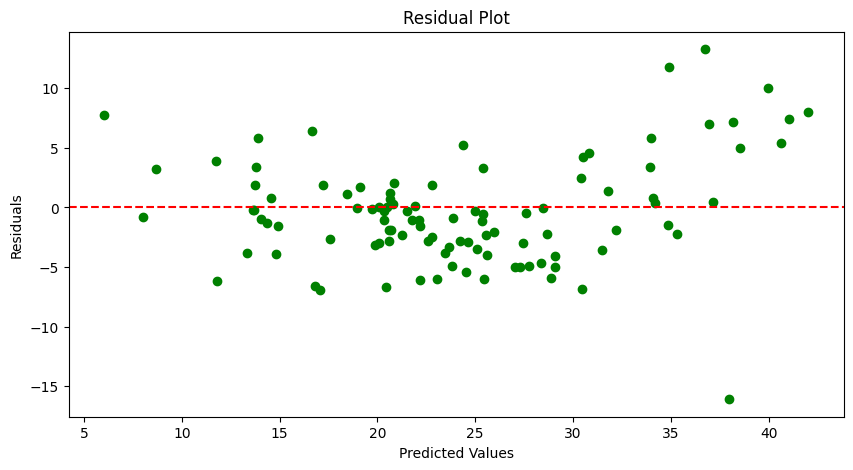

In [64]:
# Residual plot
plt.figure(figsize=(10, 5))
plt.scatter(LR_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

LR_MSE = mean_squared_error(y_test, LR_pred)
print('MSE: ',LR_MSE)

LR_MAE = mean_absolute_error(y_test, LR_pred)
print('MAE: ',LR_MAE)



intercept:  37.691775636952784
coefficient: 
 [-1.05520754e-01  4.23097338e-02  4.09272264e-02  3.45374527e+00
 -1.80792106e+01  3.47711493e+00  4.26538938e-03 -1.35301756e+00
  3.00488961e-01 -1.11180311e-02 -9.17544361e-01  8.02905534e-03
 -5.61632719e-01]
MSE:  20.12872810614254
MAE:  3.407109393645544


In [ ]:
종속변수와 전혀 상관이 없더라도 변수를 X변수에 추가하면 R2 값은 항상 증가한다

In [26]:
import statsmodels.api as sm

model = sm.OLS(X_data, y_data)
model = model.fit()
pred = model.predict